In [ ]:
'''
pip install os-sys
pip install numpy
pip install pandas
pip install geopy
pip install streamlit
pip install plotly-express
pip install requests
pip install pytest-warnings
pip install glob2
pip install pickle4
pip install scikit-learn
pip install xgboost
'''

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot  as plt
import plotly.express as px

import glob
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , GridSearchCV , ShuffleSplit 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , HistGradientBoostingRegressor 
from xgboost.sklearn import XGBRegressor 


# Data Collection

In [3]:
# set search path and glob for files
# here we want to look for csv files in the input directory
path = 'D:\\SingaporeRealEstate\\Data'
files = glob.glob(path + '/*.csv')

# create empty list to store dataframes
df_list = []

# loop through list of files and read each one into a dataframe and append to list
for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    df_list.append(temp_df)
    #print(f'Successfully created dataframe for {f} with shape {temp_df.shape}')

# concatenate our list of dataframes into one!
df_Compleat = pd.concat(df_list, axis=0)
#print(df_Compleat.shape)
#df_Compleat.head()


In [4]:
df_Compleat

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


# Data Wrangling - Data Inspection

In [5]:
# Checking for Duplicated Data 
df_Compleat.duplicated().sum()

1899

In [6]:
# Removing  Duplicated Data and cross checking it
df_Compleat.drop_duplicates(inplace=True)
df_Compleat.duplicated().sum()

0

In [7]:
df_Compleat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931263 entries, 0 to 52202
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                931263 non-null  object 
 1   town                 931263 non-null  object 
 2   flat_type            931263 non-null  object 
 3   block                931263 non-null  object 
 4   street_name          931263 non-null  object 
 5   storey_range         931263 non-null  object 
 6   floor_area_sqm       931263 non-null  float64
 7   flat_model           931263 non-null  object 
 8   lease_commence_date  931263 non-null  int64  
 9   resale_price         931263 non-null  float64
 10  remaining_lease      223800 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 85.3+ MB


In [8]:
df_Compleat.nunique()

month                   416
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9602
remaining_lease         727
dtype: int64

In [9]:
df_Compleat.shape

(931263, 11)

In [10]:
colList=df_Compleat.columns
for col in colList:
    print(col+":" +"NaN_Count=" +str( df_Compleat[col].isnull().sum()))
print("")
#print("The remaining_lease has Data of just " + str(int(df_Compleat.shape[0]) - int(( df_Compleat['remaining_lease'].isnull().sum()))) + " out of " +str(int(df_Compleat.shape[0]))+" so we shall remove this column")



month:NaN_Count=0
town:NaN_Count=0
flat_type:NaN_Count=0
block:NaN_Count=0
street_name:NaN_Count=0
storey_range:NaN_Count=0
floor_area_sqm:NaN_Count=0
flat_model:NaN_Count=0
lease_commence_date:NaN_Count=0
resale_price:NaN_Count=0
remaining_lease:NaN_Count=707463



In [11]:
df_Compleat['resale_price'].value_counts()

resale_price
300000.00    6921
350000.00    6868
280000.00    6531
320000.00    6525
380000.00    6318
             ... 
269223.00       1
267200.00       1
277700.00       1
182888.88       1
410400.00       1
Name: count, Length: 9602, dtype: int64

In [12]:
df_Compleat

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
52198,2014-12,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,NaN
52199,2014-12,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,NaN
52200,2014-12,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,NaN
52201,2014-12,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,NaN


# Data Wrangling - Feature Engineering & Dealing with missing values

In [13]:
df_ComplClean = df_Compleat.copy()

In [14]:
#Creating Median Value for storey RangeValue
def storeyMedian(RangeValue):
    minVal =int(RangeValue.split(" ")[0])
    maxVal =int(RangeValue.split(" ")[2])
    outMedVal=int((minVal+maxVal)/2)
    return outMedVal

In [15]:
#function to change Multi Gen Appartment and other Appertment as integer
def roomMod(flat_type):
    if flat_type =="EXECUTIVE":
        out =int(6)
    elif flat_type =="MULTI GENERATION":
        out =int(7)
    elif flat_type =="MULTI-GENERATION":
        out =int(7)
    else:
        out = int(flat_type.split(" ")[0])
    return out

In [16]:
df_ComplClean.drop('remaining_lease', axis = 1, inplace= True)
df_ComplClean['lease_remain_years'] = 99 - (2023 - df_Compleat['lease_commence_date'])
df_ComplClean["storey_AvgCount"] = df_ComplClean["storey_range"].apply(storeyMedian)
df_ComplClean["flatRoom_type"] = df_ComplClean["flat_type"].apply(roomMod)


In [17]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df_ComplClean[['resale_year', 'resale_month']] = df_ComplClean['month'].str.split('-', expand=True)

# drop the resale month column
df_ComplClean.drop('month', axis = 1, inplace= True)

In [18]:
#converting object datatype to  numerical integer data
df_ComplClean['resale_year'] = pd.to_numeric(df_ComplClean['resale_year'], errors='coerce')
df_ComplClean['resale_month'] = pd.to_numeric(df_ComplClean['resale_month'], errors='coerce')

In [19]:
df_ComplClean.tail()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month
52198,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,64,11,5,2014,12
52199,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,64,11,6,2014,12
52200,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68,8,6,2014,12
52201,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,61,8,6,2014,12
52202,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,545000.0,61,5,6,2014,12


In [20]:
df_ComplClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 931263 entries, 0 to 52202
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 931263 non-null  object 
 1   flat_type            931263 non-null  object 
 2   block                931263 non-null  object 
 3   street_name          931263 non-null  object 
 4   storey_range         931263 non-null  object 
 5   floor_area_sqm       931263 non-null  float64
 6   flat_model           931263 non-null  object 
 7   lease_commence_date  931263 non-null  int64  
 8   resale_price         931263 non-null  float64
 9   lease_remain_years   931263 non-null  int64  
 10  storey_AvgCount      931263 non-null  int64  
 11  flatRoom_type        931263 non-null  int64  
 12  resale_year          931263 non-null  int64  
 13  resale_month         931263 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 106.6+ MB


In [21]:
df_ComplClean.isnull().sum()

town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
lease_remain_years     0
storey_AvgCount        0
flatRoom_type          0
resale_year            0
resale_month           0
dtype: int64

In [22]:
df_ComplClean['lease_remain_years'].value_counts()

lease_remain_years
61    87633
60    63621
64    50851
63    42978
54    41399
62    38707
65    32354
56    32065
73    31096
55    31013
69    28295
72    28192
74    25801
59    23153
52    21568
75    21032
57    20962
53    20767
68    20298
77    19643
71    19082
76    18535
51    17409
79    15899
50    14567
58    13347
78    12692
46    11473
91    10388
66     9316
49     8599
80     8521
45     8353
47     7875
70     6572
92     6495
43     6203
94     5901
48     5821
89     5609
93     5500
88     5054
81     4077
90     3842
82     3238
87     2719
95     2506
84     2175
44     1868
85     1816
86     1381
67     1252
83     1000
96      716
42       34
Name: count, dtype: int64

In [23]:
# Introducing the Address Column for finding the geographical Coorrdinated such as Latitude and Longitude for Distance calculation from Aminities
df_ComplClean['address'] = df_ComplClean['block'] + " " + df_ComplClean['street_name']
df_ComplClean

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,53,5,1,1990,1,309 ANG MO KIO AVE 1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,53,8,1,1990,1,309 ANG MO KIO AVE 1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,52,5,3,1990,1,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,64,11,5,2014,12,816 YISHUN ST 81
52199,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,64,11,6,2014,12,325 YISHUN CTRL
52200,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68,8,6,2014,12,618 YISHUN RING RD
52201,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,61,8,6,2014,12,277 YISHUN ST 22


In [24]:
# Checking Count of Types of Flat Models
len(df_ComplClean['flat_model'].unique())

34

In [25]:
df_ComplClean['flat_model'].value_counts()


flat_model
Model A                   196815
Improved                  169337
New Generation            110605
NEW GENERATION             78646
IMPROVED                   73296
MODEL A                    70234
Premium Apartment          47313
Simplified                 34457
Apartment                  25763
Standard                   25263
SIMPLIFIED                 23211
Maisonette                 17589
STANDARD                   17323
MAISONETTE                 12195
Model A2                   10189
APARTMENT                   9887
DBSS                        3364
Adjoined flat               1260
Model A-Maisonette          1104
MODEL A-MAISONETTE           981
Terrace                      449
Type S1                      443
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      219
2-room                       137
Premium Apartment Loft       113
Premium Maisonette            86
Improved-Maisonette           83

In [26]:
# Merging the Duplicated Upsercase ans Lowercase Flat Models
df_ComplClean['flat_model'] = df_ComplClean['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [27]:

df_ComplClean

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,53,5,1,1990,1,309 ANG MO KIO AVE 1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,53,8,1,1990,1,309 ANG MO KIO AVE 1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,52,5,3,1990,1,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,64,11,5,2014,12,816 YISHUN ST 81
52199,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,64,11,6,2014,12,325 YISHUN CTRL
52200,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68,8,6,2014,12,618 YISHUN RING RD
52201,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,61,8,6,2014,12,277 YISHUN ST 22


In [28]:
df_ComplClean['block'].value_counts()

block
2       4588
1       4053
110     3423
101     3410
4       3343
        ... 
460C       7
240A       5
83A        4
226E       2
226F       1
Name: count, Length: 2712, dtype: int64

In [29]:
#To Export the data for Feature Engineering of geographical data and distance of MRTS station and CBD as Aminities 
df_ComplClean.to_csv('csv_data\\csv_df_Add_2_MRTS_CBD.csv',index=False)



In [36]:
#To Import the data for Feature Engineering of geographical data and distance of MRTS station and CBD as Aminities and to Exporty the dataframe for control selrctions
df_UI_CotrFilter = df_ComplClean[['town','street_name','flat_type','flat_model','address']]
df_UI_CotrFilter['flat_type'] = df_UI_CotrFilter['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION') 

df_preProcess = pd.read_csv('csv_data\\mrts_cbd_Dist_onMainDF_ToML.csv')

df_UI_CotrFilterFinal = df_UI_CotrFilter.merge(df_preProcess, on="address", how='outer')
df_UI_CotrFilterFinal=df_UI_CotrFilterFinal.drop(['address','latitude','longitude','postal_code'],axis=1)
df_UI_CotrFilterFinal.dropna(inplace=True)
df_UI_CotrFilterFinal.to_csv('csv_data\\csv_4UI_selFilter.csv',index=False)

In [32]:
df_UI_CotrFilterFinal.drop(['address','latitude','longitude','postal_code'],axis=1)

,town,street_name,flat_type,flat_model,cbd_Dist,mrt_minDist
0,KALLANG/WHAMPOA,BEACH RD,3 ROOM,Improved,1351.713661,143.728945
1,KALLANG/WHAMPOA,BEACH RD,3 ROOM,Improved,1351.713661,143.728945
2,KALLANG/WHAMPOA,BEACH RD,3 ROOM,Improved,1351.713661,143.728945
3,KALLANG/WHAMPOA,BEACH RD,3 ROOM,Improved,1351.713661,143.728945
4,KALLANG/WHAMPOA,BEACH RD,3 ROOM,Improved,1351.713661,143.728945
...,...,...,...,...,...,...
931259,BUKIT MERAH,BOON TIONG RD,5 ROOM,Improved,2525.251132,182.864524
931260,BUKIT MERAH,BOON TIONG RD,5 ROOM,Improved,2525.251132,182.864524
931261,BUKIT MERAH,BOON TIONG RD,4 ROOM,Model A,2525.251132,182.864524
931262,BUKIT MERAH,BOON TIONG RD,5 ROOM,Improved,2525.251132,182.864524


In [37]:
df_UI_CotrFilterFinal.isnull().sum()

town           0
street_name    0
flat_type      0
flat_model     0
cbd_Dist       0
mrt_minDist    0
dtype: int64

In [99]:
# To pick all the Towns Listed in the data
df_ComplClean['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [100]:
df_cleanData = df_ComplClean.copy()

In [101]:
df_cleanData

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,53,5,1,1990,1,309 ANG MO KIO AVE 1
2,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
3,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,53,8,1,1990,1,309 ANG MO KIO AVE 1
4,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,52,5,3,1990,1,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,YISHUN,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,64,11,5,2014,12,816 YISHUN ST 81
52199,YISHUN,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,64,11,6,2014,12,325 YISHUN CTRL
52200,YISHUN,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68,8,6,2014,12,618 YISHUN RING RD
52201,YISHUN,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,61,8,6,2014,12,277 YISHUN ST 22


In [102]:
# list unique Town names
towns = df_cleanData['town'].unique()
# map the streets to povide input to ML model
towns_mapping = {town: idx + 1 for idx, town in enumerate(towns)}
# Convert dictionary to pickle
with open('saved_Model_Pickel\\townMapping.pkl', 'wb') as file:
    pickle.dump(towns_mapping, file)
towns_mapping

{'ANG MO KIO': 1,
 'BEDOK': 2,
 'BISHAN': 3,
 'BUKIT BATOK': 4,
 'BUKIT MERAH': 5,
 'BUKIT TIMAH': 6,
 'CENTRAL AREA': 7,
 'CHOA CHU KANG': 8,
 'CLEMENTI': 9,
 'GEYLANG': 10,
 'HOUGANG': 11,
 'JURONG EAST': 12,
 'JURONG WEST': 13,
 'KALLANG/WHAMPOA': 14,
 'MARINE PARADE': 15,
 'QUEENSTOWN': 16,
 'SENGKANG': 17,
 'SERANGOON': 18,
 'TAMPINES': 19,
 'TOA PAYOH': 20,
 'WOODLANDS': 21,
 'YISHUN': 22,
 'LIM CHU KANG': 23,
 'SEMBAWANG': 24,
 'BUKIT PANJANG': 25,
 'PASIR RIS': 26,
 'PUNGGOL': 27}

In [103]:
#Replacing the String 'Key' to Numerical 'Value' Of the dictionary from Label Encoding
df_cleanData['town'] = df_cleanData['town'].map(towns_mapping)
df_cleanData

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
0,1,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,9000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
1,1,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,Improved,1977,6000.0,53,5,1,1990,1,309 ANG MO KIO AVE 1
2,1,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,Improved,1977,8000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
3,1,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,Improved,1977,6000.0,53,8,1,1990,1,309 ANG MO KIO AVE 1
4,1,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,47200.0,52,5,3,1990,1,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,22,5 ROOM,816,YISHUN ST 81,10 TO 12,122.0,Improved,1988,580000.0,64,11,5,2014,12,816 YISHUN ST 81
52199,22,EXECUTIVE,325,YISHUN CTRL,10 TO 12,146.0,Maisonette,1988,540000.0,64,11,6,2014,12,325 YISHUN CTRL
52200,22,EXECUTIVE,618,YISHUN RING RD,07 TO 09,164.0,Apartment,1992,738000.0,68,8,6,2014,12,618 YISHUN RING RD
52201,22,EXECUTIVE,277,YISHUN ST 22,07 TO 09,152.0,Maisonette,1985,592000.0,61,8,6,2014,12,277 YISHUN ST 22


In [104]:
# list unique street names
streets = df_cleanData['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
# Convert dictionary to pickle
with open('saved_Model_Pickel\\streetMapping.pkl', 'wb') as file:
    pickle.dump(streets_mapping, file)


streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [105]:
#Replacing the String 'Key' to Numerical 'Value' Of the dictionary from Label Encoding
df_cleanData['street_name'] = df_cleanData['street_name'].map(streets_mapping)

In [106]:
# list unique street names
flatModelTypes = df_cleanData['flat_model'].unique()
# map the streets to povide input to ML model
flatType_mapping = {flatModelType: idx + 1 for idx, flatModelType in enumerate(flatModelTypes)}
# Convert dictionary to pickle
with open('saved_Model_Pickel\\flatTypeMapping.pkl', 'wb') as file:
    pickle.dump(flatType_mapping, file)
flatType_mapping


{'Improved': 1,
 'New Generation': 2,
 'Model A': 3,
 'Standard': 4,
 'Simplified': 5,
 'Model A-Maisonette': 6,
 'Apartment': 7,
 'Maisonette': 8,
 'Terrace': 9,
 '2-room': 10,
 'Improved-Maisonette': 11,
 'Multi Generation': 12,
 'Premium Apartment': 13,
 'Adjoined flat': 14,
 'Premium Maisonette': 15,
 'Model A2': 16,
 'Type S1': 17,
 'Type S2': 18,
 'DBSS': 19,
 'Premium Apartment Loft': 20,
 '3Gen': 21}

In [107]:
#Replacing the String 'Key' to Numerical 'Value' Of the dictionary from Label Encoding
df_cleanData['flat_model'] = df_cleanData['flat_model'].map(flatType_mapping)

In [108]:
df_cleanData

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
0,1,1 ROOM,309,1,10 TO 12,31.0,1,1977,9000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
1,1,1 ROOM,309,1,04 TO 06,31.0,1,1977,6000.0,53,5,1,1990,1,309 ANG MO KIO AVE 1
2,1,1 ROOM,309,1,10 TO 12,31.0,1,1977,8000.0,53,11,1,1990,1,309 ANG MO KIO AVE 1
3,1,1 ROOM,309,1,07 TO 09,31.0,1,1977,6000.0,53,8,1,1990,1,309 ANG MO KIO AVE 1
4,1,3 ROOM,216,1,04 TO 06,73.0,2,1976,47200.0,52,5,3,1990,1,216 ANG MO KIO AVE 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52198,22,5 ROOM,816,305,10 TO 12,122.0,1,1988,580000.0,64,11,5,2014,12,816 YISHUN ST 81
52199,22,EXECUTIVE,325,330,10 TO 12,146.0,8,1988,540000.0,64,11,6,2014,12,325 YISHUN CTRL
52200,22,EXECUTIVE,618,219,07 TO 09,164.0,7,1992,738000.0,68,8,6,2014,12,618 YISHUN RING RD
52201,22,EXECUTIVE,277,224,07 TO 09,152.0,8,1985,592000.0,61,8,6,2014,12,277 YISHUN ST 22


# Data Wrangling - Importing processed data of Geo CoOrdinate data and the corrosponding distance data from MRTS and CBD as Aminities

In [109]:
df_coordinates = pd.read_csv('csv_data\\mrts_cbd_Dist_onMainDF_ToML.csv')

In [110]:
df_dataFetEng = df_cleanData.merge(df_coordinates, on="address", how='outer')
df_dataFetEng

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address,latitude,longitude,postal_code,cbd_Dist,mrt_minDist
0,14.0,3 ROOM,1,143.0,04 TO 06,68.0,1.0,1979.0,56000.0,55.0,5.0,3.0,1990.0,1.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
1,14.0,3 ROOM,1,143.0,10 TO 12,68.0,1.0,1979.0,46000.0,55.0,11.0,3.0,1990.0,3.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
2,14.0,3 ROOM,1,143.0,07 TO 09,74.0,1.0,1979.0,53800.0,55.0,8.0,3.0,1990.0,5.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
3,14.0,3 ROOM,1,143.0,07 TO 09,68.0,1.0,1979.0,45000.0,55.0,8.0,3.0,1990.0,9.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
4,14.0,3 ROOM,1,143.0,16 TO 18,68.0,1.0,1979.0,55000.0,55.0,17.0,3.0,1990.0,10.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931259,5.0,5 ROOM,9B,488.0,22 TO 24,112.0,1.0,2016.0,1325000.0,92.0,23.0,5.0,2023.0,8.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524
931260,5.0,5 ROOM,9B,488.0,19 TO 21,112.0,1.0,2016.0,1400000.0,92.0,20.0,5.0,2023.0,12.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524
931261,5.0,4 ROOM,9B,488.0,25 TO 27,92.0,3.0,2016.0,1188000.0,92.0,26.0,4.0,2024.0,3.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524
931262,5.0,5 ROOM,9B,488.0,34 TO 36,112.0,1.0,2016.0,1588000.0,92.0,35.0,5.0,2024.0,6.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524


In [111]:
df_dataFetEng.dropna(inplace=True)
df_dataFetEng

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address,latitude,longitude,postal_code,cbd_Dist,mrt_minDist
0,14.0,3 ROOM,1,143.0,04 TO 06,68.0,1.0,1979.0,56000.0,55.0,5.0,3.0,1990.0,1.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
1,14.0,3 ROOM,1,143.0,10 TO 12,68.0,1.0,1979.0,46000.0,55.0,11.0,3.0,1990.0,3.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
2,14.0,3 ROOM,1,143.0,07 TO 09,74.0,1.0,1979.0,53800.0,55.0,8.0,3.0,1990.0,5.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
3,14.0,3 ROOM,1,143.0,07 TO 09,68.0,1.0,1979.0,45000.0,55.0,8.0,3.0,1990.0,9.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
4,14.0,3 ROOM,1,143.0,16 TO 18,68.0,1.0,1979.0,55000.0,55.0,17.0,3.0,1990.0,10.0,1 BEACH RD,1.294801,103.854467,189673,1351.713661,143.728945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931259,5.0,5 ROOM,9B,488.0,22 TO 24,112.0,1.0,2016.0,1325000.0,92.0,23.0,5.0,2023.0,8.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524
931260,5.0,5 ROOM,9B,488.0,19 TO 21,112.0,1.0,2016.0,1400000.0,92.0,20.0,5.0,2023.0,12.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524
931261,5.0,4 ROOM,9B,488.0,25 TO 27,92.0,3.0,2016.0,1188000.0,92.0,26.0,4.0,2024.0,3.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524
931262,5.0,5 ROOM,9B,488.0,34 TO 36,112.0,1.0,2016.0,1588000.0,92.0,35.0,5.0,2024.0,6.0,9B BOON TIONG RD,1.286814,103.828928,163009,2525.251132,182.864524


In [284]:
df_cleanData['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
      dtype=int64)

In [112]:
#converting float data type to int data type
df_dataFetEng['town'] = df_dataFetEng['town'].astype('int64')
df_dataFetEng['street_name'] = df_dataFetEng['street_name'].astype('int64')
df_dataFetEng['flat_model'] = df_dataFetEng['flat_model'].astype('int64')
df_dataFetEng['lease_remain_years'] = df_dataFetEng['lease_remain_years'].astype('int64')
df_dataFetEng['storey_AvgCount'] = df_dataFetEng['storey_AvgCount'].astype('int64')
df_dataFetEng['flatRoom_type'] = df_dataFetEng['flatRoom_type'].astype('int64')
df_dataFetEng['resale_year'] = df_dataFetEng['resale_year'].astype('int64')
df_dataFetEng['resale_month'] = df_dataFetEng['resale_month'].astype('int64')


In [113]:
df_dataFetEng.isnull().sum()

town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
lease_remain_years     0
storey_AvgCount        0
flatRoom_type          0
resale_year            0
resale_month           0
address                0
latitude               0
longitude              0
postal_code            0
cbd_Dist               0
mrt_minDist            0
dtype: int64

In [397]:
df_dataFetEng.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911285 entries, 0 to 931263
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 911285 non-null  int64  
 1   flat_type            911285 non-null  object 
 2   block                911285 non-null  object 
 3   street_name          911285 non-null  int64  
 4   storey_range         911285 non-null  object 
 5   floor_area_sqm       911285 non-null  float64
 6   flat_model           911285 non-null  int64  
 7   lease_commence_date  911285 non-null  int64  
 8   resale_price         911285 non-null  float64
 9   lease_remain_years   911285 non-null  int64  
 10  storey_AvgCount      911285 non-null  int64  
 11  flatRoom_type        911285 non-null  int64  
 12  resale_year          911285 non-null  int64  
 13  resale_month         911285 non-null  int64  
 14  address              911285 non-null  object 
 15  latitude             9

In [398]:
df_ML= df_dataFetEng[['town','street_name','storey_AvgCount','flat_model' ,'flatRoom_type','lease_remain_years','resale_year','resale_month','floor_area_sqm','cbd_Dist','mrt_minDist','resale_price']]
df_ML

,town,street_name,storey_AvgCount,flat_model,flatRoom_type,lease_remain_years,resale_year,resale_month,floor_area_sqm,cbd_Dist,mrt_minDist,resale_price
0,14,143,5,1,3,55,1990,1,68.0,1351.713661,143.728945,56000.0
1,14,143,11,1,3,55,1990,3,68.0,1351.713661,143.728945,46000.0
2,14,143,8,1,3,55,1990,5,74.0,1351.713661,143.728945,53800.0
3,14,143,8,1,3,55,1990,9,68.0,1351.713661,143.728945,45000.0
4,14,143,17,1,3,55,1990,10,68.0,1351.713661,143.728945,55000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
931259,5,488,23,1,5,92,2023,8,112.0,2525.251132,182.864524,1325000.0
931260,5,488,20,1,5,92,2023,12,112.0,2525.251132,182.864524,1400000.0
931261,5,488,26,3,4,92,2024,3,92.0,2525.251132,182.864524,1188000.0
931262,5,488,35,1,5,92,2024,6,112.0,2525.251132,182.864524,1588000.0


In [399]:
df_ML.describe()

,town,street_name,storey_AvgCount,flat_model,flatRoom_type,lease_remain_years,resale_year,resale_month,floor_area_sqm,cbd_Dist,mrt_minDist,resale_price
count,911285.000000,911285.000000,911285.000000,911285.000000,911285.00000,911285.000000,911285.000000,911285.000000,911285.000000,911285.000000,911285.000000,9.112850e+05
mean,13.714430,239.842771,7.717321,3.534285,4.03883,64.594542,2006.433680,6.555463,96.428858,12203.383542,765.813417,3.264257e+05
std,7.835607,158.593026,4.844280,3.343698,0.93953,10.596130,9.383019,3.402373,25.514571,4366.739885,411.154110,1.709534e+05
min,1.000000,1.000000,2.000000,1.000000,1.00000,42.000000,1990.000000,1.000000,31.000000,592.121638,36.079525,5.000000e+03
25%,8.000000,114.000000,5.000000,1.000000,3.00000,57.000000,1999.000000,4.000000,73.000000,9319.382184,459.992482,2.000000e+05
50%,13.000000,219.000000,8.000000,3.000000,4.00000,62.000000,2005.000000,7.000000,94.000000,12919.010173,698.538883,3.020000e+05
75%,21.000000,367.000000,11.000000,3.000000,5.00000,72.000000,2014.000000,9.000000,114.000000,15502.328503,982.061433,4.202000e+05
max,27.000000,582.000000,50.000000,21.000000,7.00000,96.000000,2024.000000,12.000000,366.700000,20225.103698,3646.118943,1.588000e+06


In [400]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 911285 entries, 0 to 931263
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   town                911285 non-null  int64  
 1   street_name         911285 non-null  int64  
 2   storey_AvgCount     911285 non-null  int64  
 3   flat_model          911285 non-null  int64  
 4   flatRoom_type       911285 non-null  int64  
 5   lease_remain_years  911285 non-null  int64  
 6   resale_year         911285 non-null  int64  
 7   resale_month        911285 non-null  int64  
 8   floor_area_sqm      911285 non-null  float64
 9   cbd_Dist            911285 non-null  float64
 10  mrt_minDist         911285 non-null  float64
 11  resale_price        911285 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 90.4 MB


In [401]:
df_ML.to_csv('csv_data\\ML_data4Prediction.csv',index=False)

In [402]:
# correlation matrix (ranges from 1 to -1)
corrMat=df_ML.corr()
#corrm.to_csv('corrm.csv')
corrMat

,town,street_name,storey_AvgCount,flat_model,flatRoom_type,lease_remain_years,resale_year,resale_month,floor_area_sqm,cbd_Dist,mrt_minDist,resale_price
town,1.000000,0.585869,-0.022911,0.174397,0.205338,0.335802,0.119393,0.004205,0.198846,0.437645,0.135760,0.108465
street_name,0.585869,1.000000,0.082142,0.378724,0.378547,0.739202,0.309702,0.006706,0.345326,0.443335,0.151517,0.360294
storey_AvgCount,-0.022911,0.082142,1.000000,0.053408,0.072978,0.170923,0.107495,-0.002607,0.036124,-0.112162,0.035715,0.248235
flat_model,0.174397,0.378724,0.053408,1.000000,0.291911,0.386237,0.177349,0.001989,0.250850,0.184390,0.061244,0.290669
flatRoom_type,0.205338,0.378547,0.072978,0.291911,1.000000,0.388877,0.082102,0.003123,0.952094,0.257010,0.064991,0.574631
lease_remain_years,0.335802,0.739202,0.170923,0.386237,0.388877,1.000000,0.421185,0.004776,0.361341,0.404327,0.159216,0.524780
resale_year,0.119393,0.309702,0.107495,0.177349,0.082102,0.421185,1.000000,-0.024413,0.040620,0.076399,0.086127,0.671975
resale_month,0.004205,0.006706,-0.002607,0.001989,0.003123,0.004776,-0.024413,1.000000,0.002345,0.001305,-0.001279,0.005392
floor_area_sqm,0.198846,0.345326,0.036124,0.250850,0.952094,0.361341,0.040620,0.002345,1.000000,0.285021,0.059255,0.546074
cbd_Dist,0.437645,0.443335,-0.112162,0.184390,0.257010,0.404327,0.076399,0.001305,0.285021,1.000000,0.103518,-0.016061


# EDA - Exploratory Data Analysis on the features

# Checking and Handling for Skewness in the Data

<Axes: title={'center': 'Correlation Heatmap'}>

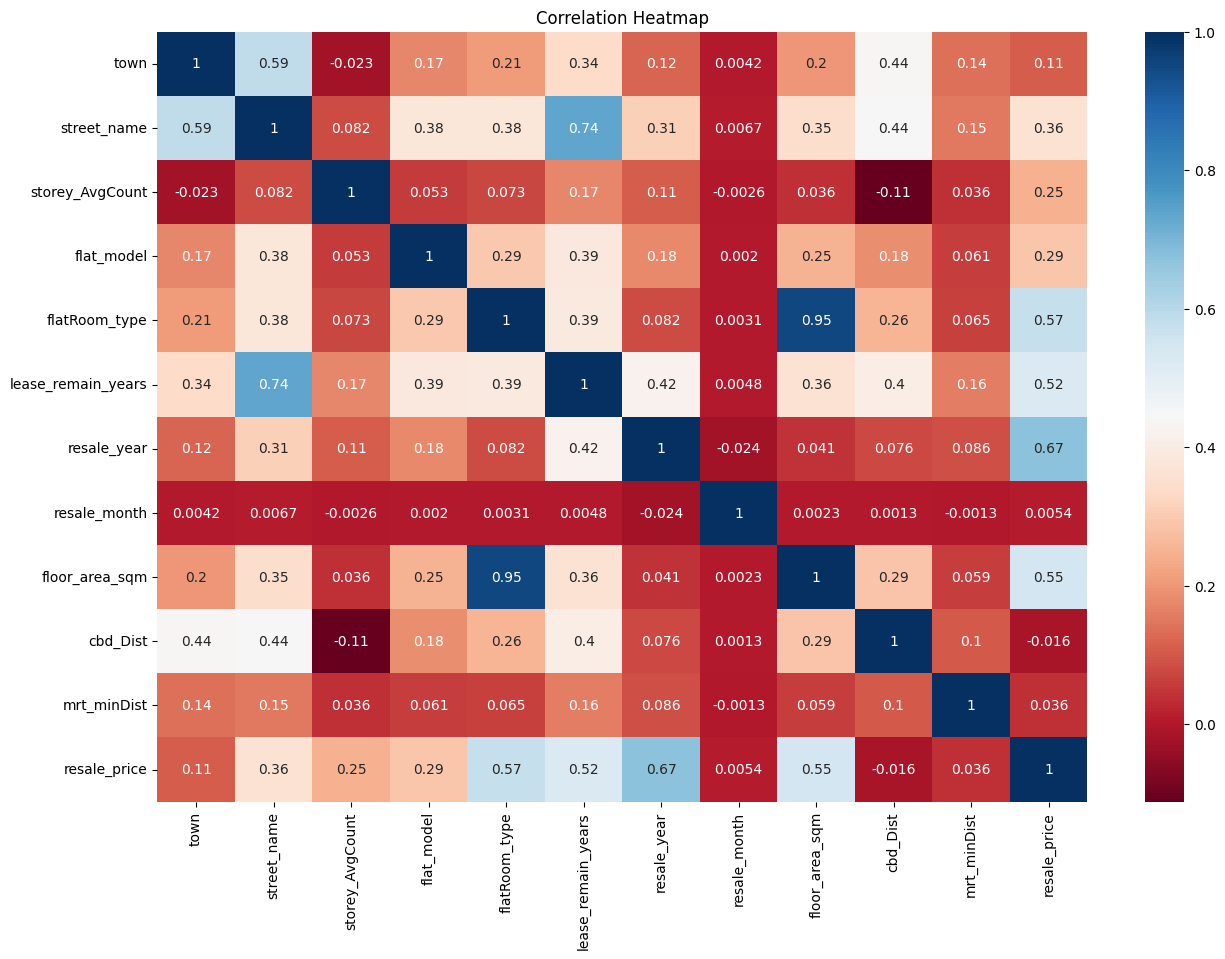

In [403]:

import seaborn as sns
plt.figure(figsize=(15, 10))
plt.title("Correlation Heatmap")
sns.heatmap(
    corrMat, 
    xticklabels=corrMat.columns,
    yticklabels=corrMat.columns,
    cmap='RdBu', 
    annot=True
)

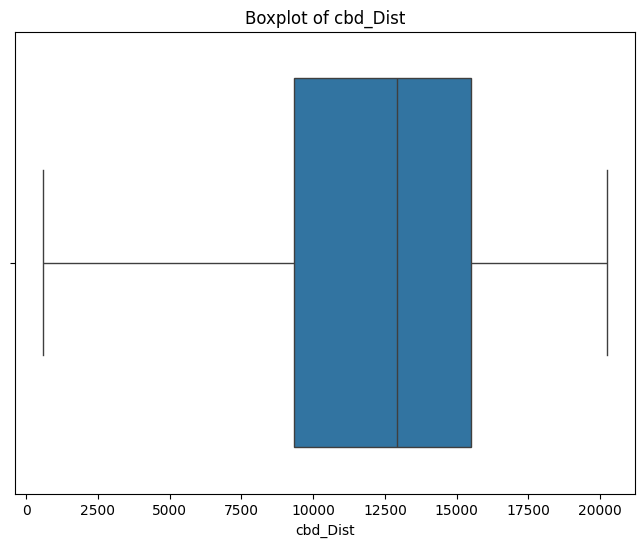

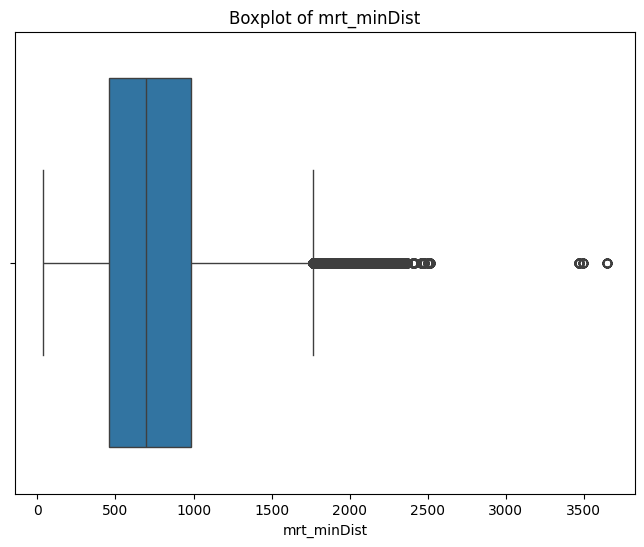

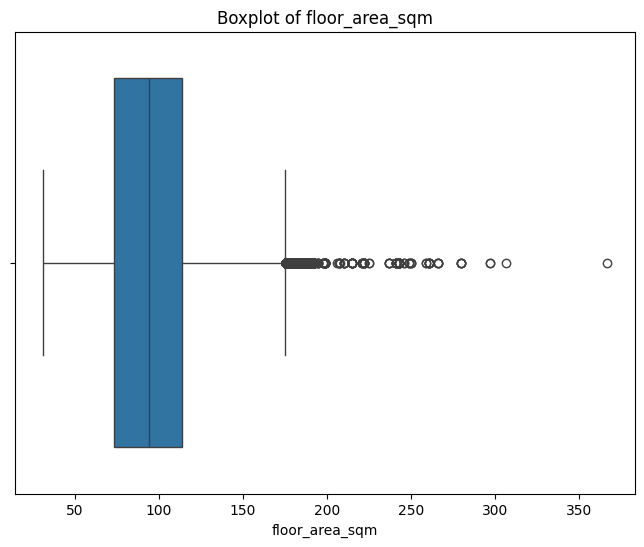

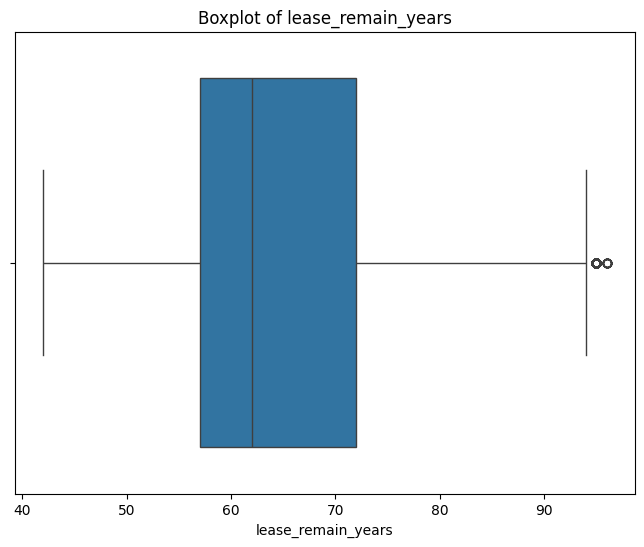

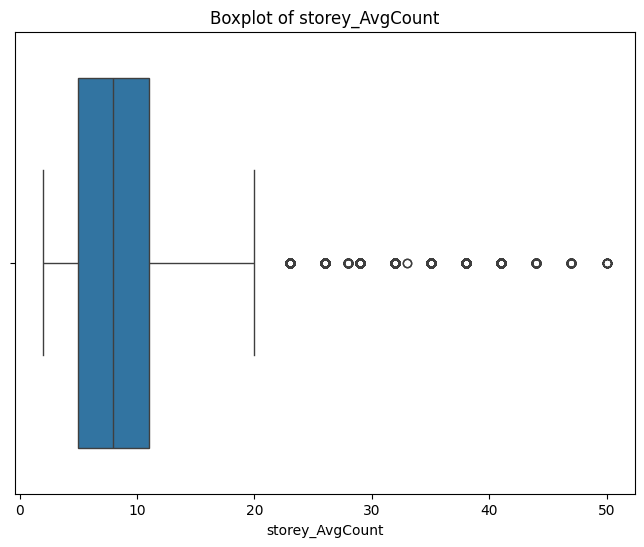

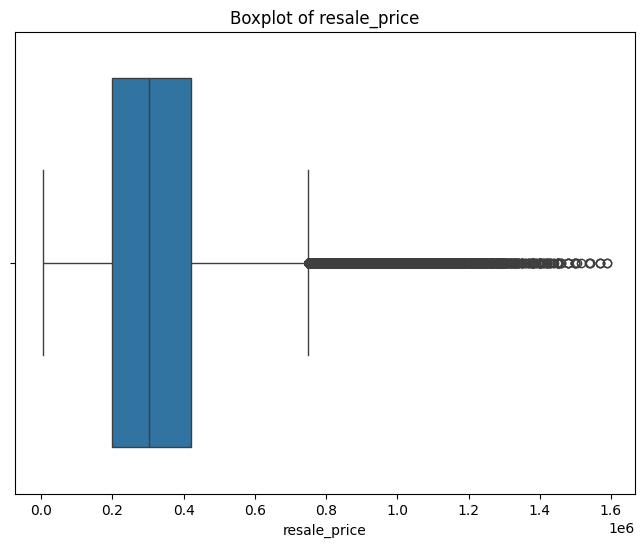

In [404]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns(continuous variables) for finding skewness
col = ['cbd_Dist','mrt_minDist','floor_area_sqm','lease_remain_years','storey_AvgCount','resale_price']

for i in col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(data=df_ML, x=i)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

In [405]:
df_ML_LOG = df_ML

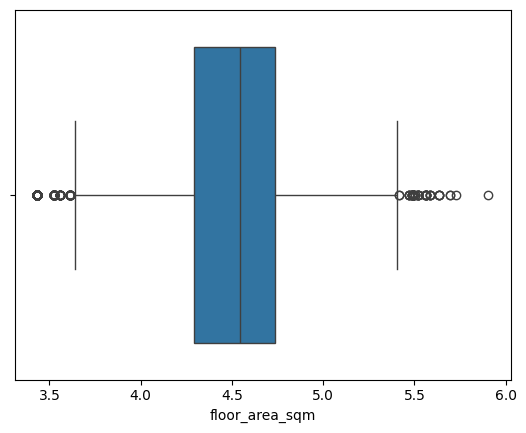

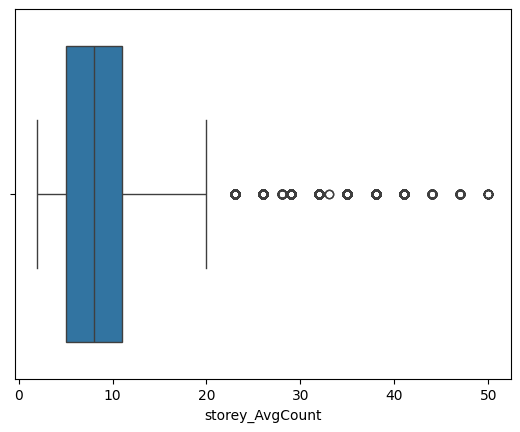

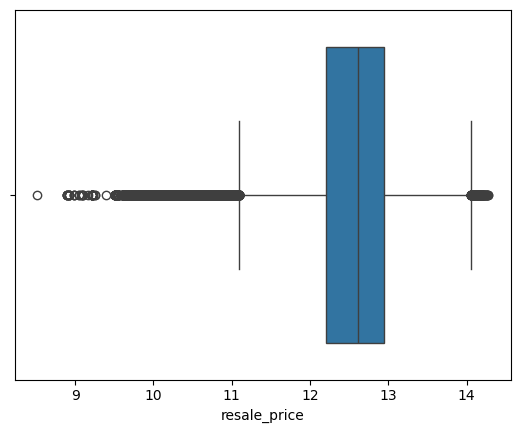

In [406]:
# Apply a logarithmic transformation to the required columns only.
# One need to apply it and check, in some cases it will handle the skewness, and in other cases it might not have a great 
                                                                # effect on the data, so no need to apply for that columns
    
df_ML_LOG['floor_area_sqm'] = np.log(df_ML_LOG['floor_area_sqm'])
sns.boxplot(x='floor_area_sqm', data=df_ML_LOG)
plt.show()

df_ML_LOG['storey_median'] = np.log(df_ML_LOG['storey_AvgCount'])
sns.boxplot(x='storey_AvgCount', data=df_ML_LOG)
plt.show()

df_ML_LOG['resale_price'] = np.log(df_ML_LOG['resale_price'])
sns.boxplot(x='resale_price', data=df_ML_LOG)
plt.show()

In [407]:
# assign feature and target variable
X = df_ML.drop('resale_price', axis= 1)
y = df_ML['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [408]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(729028, 12) (182257, 12) (729028,) (182257,)


In [409]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.80181016,  0.02664   ,  0.67812012, ..., -1.58035032,
          0.84881468,  0.82396755],
        [-0.34682293, -0.79956629, -0.56017053, ..., -0.40098962,
         -0.42785649, -0.3244207 ],
        [-1.49545601, -1.38610969, -1.17931586, ..., -0.4230047 ,
          1.30337453, -1.65899828],
        ...,
        [-0.09157113, -0.69234868, -1.17931586, ...,  0.70475295,
          0.68116152, -1.65899828],
        [-1.11257832,  1.14927144, -1.17931586, ..., -1.97661945,
         -0.82083273, -1.65899828],
        [ 1.69519145,  1.66643874, -1.17931586, ...,  0.40799569,
          0.89412664, -1.65899828]]),
 array([[-0.60207472, -0.93201158,  0.67812012, ..., -0.48723062,
          0.72926039,  0.82396755],
        [ 1.43993965,  0.59426264,  0.67812012, ...,  0.63149534,
         -0.49812123,  0.82396755],
        [-0.09157113,  1.13035069,  1.29726545, ...,  0.69670708,
          2.54489794,  1.17522012],
        ...,
        [ 1.05706196, -0.13103296,  0.0589748 , ...,  

In [410]:
linear_model = LinearRegression(fit_intercept=True) #initialise
linear_model.fit(X_train_scaled,y_train) #fit - all magic
print(linear_model.predict(X_test))     #predict
print(y_test)

[ -385.33701951  -912.18376357  -975.86450017 ... -1060.43755265
  -390.59464896 -1280.61392034]
811731    11.898188
705918    13.028053
145713    12.254863
878673    11.695247
558322    12.278393
            ...    
285767    12.128111
282418    12.180755
462160    13.060488
601158    12.122691
494880    12.994530
Name: resale_price, Length: 182257, dtype: float64


In [411]:
linear_model.score(X_test_scaled, y_test)

0.7922554079356943

In [412]:
cross_val_linear_model=cross_val_score(linear_model,X_train_scaled,y_train,cv=10).mean()
cross_val_linear_model


0.7928668491344418

In [413]:
cv = ShuffleSplit(n_splits=5 , test_size=0.2 , random_state = 0)
cross_val_score(linear_model,X_train_scaled,y_train,cv=cv)

array([0.79254957, 0.79312017, 0.79306561, 0.79308712, 0.79234143])

# Parameter HyperTuning

In [414]:
# Warning Running the parameter Hyper tuning consumes much more time based on the model and its parameters
'''
dtr = DecisionTreeRegressor()

# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 22],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],
    'max_features': ['auto', 'sqrt', 'log2']
}

# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)


'''

'\ndtr = DecisionTreeRegressor()\n\n# hyperparameters\nparam_grid = {\n    \'max_depth\': [2, 5, 10, 15, 20, 22],\n    \'min_samples_split\': [2, 3, 4, 5],\n    \'min_samples_leaf\': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# gridsearchcv\ngrid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\nprint("Best hyperparameters:", grid_search.best_params_)\nbest_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test)\n\n# evalution metrics\nmse = mean_squared_error(y_test, y_pred)\nmae = mean_absolute_error(y_test, y_pred)\nrmse = np.sqrt(mse)\nr2 = r2_score(y_test, y_pred)\nprint(" ")\nprint(\'Mean squared error:\', mse)\nprint(\'Mean Absolute Error\', mae)\nprint(\'Root Mean squared error:\', rmse)\nprint(" ")\nprint(\'R-squared:\', r2)\n\n\n'

In [415]:


model = LinearRegression()

# hyperparameters
param_grid = {
    'fit_intercept': [True,False],
    'copy_X': [True,False],
    'n_jobs': [-1],
    'positive':[True,False]
}

# gridsearchcv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)



Best hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
 
Mean squared error: 0.07304240906065877
Mean Absolute Error 0.19912869872882558
Root Mean squared error: 0.2702635918148406
 
R-squared: 0.7922554079356943


In [416]:
# Warning Running the parameter Hyper tuning consumes much more time based on the model and its parameters

'''
model = KNeighborsRegressor() 

# hyperparameters     param - 
param_grid = {
    'n_neighbors': [1,3,5,7,10],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 20, 30, 45, 60],
    'algorithm': ['auto', 'ball_tree', 'kd_tree','brute'],
    'n_jobs':[-1,-2]
}

# gridsearchcv
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# evalution metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(" ")
print('Mean squared error:', mse)
print('Mean Absolute Error', mae)
print('Root Mean squared error:', rmse)
print(" ")
print('R-squared:', r2)

'''

'\nmodel = KNeighborsRegressor() \n\n# hyperparameters     param - \nparam_grid = {\n    \'n_neighbors\': [1,3,5,7,10],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'leaf_size\': [5, 10, 20, 30, 45, 60],\n    \'algorithm\': [\'auto\', \'ball_tree\', \'kd_tree\',\'brute\'],\n    \'n_jobs\':[-1,-2]\n}\n\n# gridsearchcv\ngrid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\nprint("Best hyperparameters:", grid_search.best_params_)\nbest_model = grid_search.best_estimator_\ny_pred = best_model.predict(X_test)\n\n# evalution metrics\nmse = mean_squared_error(y_test, y_pred)\nmae = mean_absolute_error(y_test, y_pred)\nrmse = np.sqrt(mse)\nr2 = r2_score(y_test, y_pred)\nprint(" ")\nprint(\'Mean squared error:\', mse)\nprint(\'Mean Absolute Error\', mae)\nprint(\'Root Mean squared error:\', rmse)\nprint(" ")\nprint(\'R-squared:\', r2)\n\n'

# Model Evaluation and Comparison By R Squared Score

In [417]:
# Create and train the Linear Regression    fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

linear_regresson= LinearRegression(fit_intercept=True ,copy_X =True ,n_jobs =-1 ,positive = True)
linear_regresson.fit(X_train_scaled, y_train)

# Make predictions on the test set using Linear Regression model
y_pred_lr = linear_regresson.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Calculate Mean Squared Error (MSE)
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mse_lr)

# Calculate R-squared (R2) Score
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Absolute Error (MAE)    :", mae_lr)
print("Mean Squared Error (MSE)     :", mse_lr)
print("Root Mean Square Error (RMSE):", rmse_lr)
print("R-squared (R2) Score         :", r2_lr)

Mean Absolute Error (MAE)    : 0.2177349734295181
Mean Squared Error (MSE)     : 0.08308441781579604
Root Mean Square Error (RMSE): 0.2882436778418497
R-squared (R2) Score         : 0.7636942879073325


In [418]:
# Create and train the K Nearest Neighbor Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=6 ,weights ='distance',leaf_size =12 , algorithm = "auto" ,n_jobs=-1 )  # You may need to adjust the number of neighbors
knn_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using KNN model
y_pred_knn = knn_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# Calculate Mean Squared Error (MSE)
mse_knn = mean_squared_error(y_test, y_pred_knn)

# Calculate Root Mean Squared Error (RMSE)
rmse_knn = np.sqrt(mse_knn)

# Calculate R-squared (R2) Score
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 0.10190677458986412
Mean Squared Error (MSE)     : 0.02229135716076286
Root Mean Square Error (RMSE): 0.1493029040600445
R-squared (R2) Score         : 0.9365997239209808


0.9365997239209808

In [419]:
# Create and train the Decision Tree Regressor model
# best regressor parameters form hyper parameter tuning ---> Best hyperparameters: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 15, 'min_samples_split': 4}
dt_regressor = DecisionTreeRegressor(max_depth=25, max_features = 1.0 ,min_samples_leaf = 10, min_samples_split = 4 ,random_state=12)
dt_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set using Decision Tree model
y_pred_dt = dt_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae_dt = mean_absolute_error(y_test, y_pred_dt)

# Calculate Mean Squared Error (MSE)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Calculate Root Mean Squared Error (RMSE)
rmse_dt = np.sqrt(mse_dt)

# Calculate R-squared (R2) Score
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)

Mean Absolute Error (MAE)    : 0.05828053435988258
Mean Squared Error (MSE)     : 0.00692664426420619
Root Mean Square Error (RMSE): 0.08322646372522498
R-squared (R2) Score         : 0.9802994875778663


0.980291699035211 ,0.9796277722615176 0.9800772719823846

In [420]:

# Create and train the Random Forest Regressor model
#rf_regressor = RandomForestRegressor(random_state=41 ,max_depth=6, min_samples_split=4, min_samples_leaf=50, max_features=1.0, max_leaf_nodes=100,n_jobs=-1)
rf_regressor = RandomForestRegressor(random_state=40 , max_depth=25 ,min_samples_split=10 ,min_samples_leaf=2 ,max_leaf_nodes=750000,n_jobs=-1)

rf_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2_rf = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2_rf)

Mean Absolute Error (MAE)    : 0.04985365725315913
Mean Squared Error (MSE)     : 0.005269543588605569
Root Mean Square Error (RMSE): 0.07259162202765253
R-squared (R2) Score         : 0.9850125537032763


0.9850126105404566 , 0.9849952363670411 ,0.9849951868321073 ,0.9849926255349212 ,0.9678740612285338 , 0.9842150835507794 ,0.9844141248689885 ,0.9845607984538296 , 0.9848393998146944 , 0.9849635322792324

In [421]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor(n_estimators=2820 ,booster='gbtree', max_depth= 6 ,max_leaves=33, subsample = 1.0 ,colsample_bytree =0.8, random_state=1 , n_jobs=-1 )
xgregressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2_xgb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2_xgb)

Mean Absolute Error (MAE)    : 0.04638336247596935
Mean Squared Error (MSE)     : 0.004624195002951262
Root Mean Square Error (RMSE): 0.06800143383011319
R-squared (R2) Score         : 0.9868480309334249


0.9868480309334249 ,0.9866395531452856 , 0.9867163263528459 , 0.9868122783071148 ,0.9868153811534188 , 0.986870974342762

In [422]:
sampleData=[14,143,5,1,3,55,1990,1,68.0,1351.713661,143.728945]

In [423]:
#y_pred = xgregressor.predict(sampleData)

In [424]:
# Create and train the HistGradientBoost Regressor model
hgbregressor = HistGradientBoostingRegressor(loss='squared_error', quantile=None, learning_rate=0.2, max_iter=900, max_leaf_nodes=31, max_depth=None, min_samples_leaf=20, l2_regularization=0.1, max_features=1.0, max_bins=255, categorical_features='warn', monotonic_cst=None, interaction_cst=None, warm_start=False, early_stopping='auto', scoring='loss', validation_fraction=0.1, n_iter_no_change=10, tol=1e-07, verbose=0, random_state=None)
hgbregressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = hgbregressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2_hgb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2_hgb)

Mean Absolute Error (MAE)    : 0.048282763977428235
Mean Squared Error (MSE)     : 0.004825966644905496
Root Mean Square Error (RMSE): 0.06946917766107136
R-squared (R2) Score         : 0.9862741592883493


0.9863280090708477 0.986330115211289 

In [425]:
# Create and train an AdaBoost regressor
adregressor = AdaBoostRegressor(estimator=None, n_estimators=44, learning_rate=1.0, loss='linear', random_state=41 )
adregressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = adregressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2_adb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2_adb)

Mean Absolute Error (MAE)    : 0.17535177299793642
Mean Squared Error (MSE)     : 0.048929148881430004
Root Mean Square Error (RMSE): 0.2211993419552373
R-squared (R2) Score         : 0.8608374750347442


0.8646016247979204

In [426]:
models = ['LinearRegression','KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor','HGBRegressor','AdaBoostRegressor']
score = [r2_lr,r2_knn,r2_dt, r2_rf, r2_xgb , r2_hgb, r2_adb ]

fig=px.line(x=models, y=score,title='R_2 score Regression Models comparison chart',)
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model
        if max_model=='LinearRegression':
            choosen_model=linear_regresson
        elif max_model=='KNeighborsRegressor':
            choosen_model=knn_regressor
        elif max_model=='DecisionTreeRegressor':
            choosen_model=dt_regressor
        elif max_model=='RandomForestRegressor':
            choosen_model=rf_regressor
        elif max_model=='XGBRegressor':
            choosen_model=xgregressor
        elif max_model=='HGBRegressor':
            choosen_model=hgbregressor
        else:
            choosen_model=adregressor



print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")
print(choosen_model)

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

LinearRegression 0.7636942879073325
KNeighborsRegressor 0.9365997239209808
DecisionTreeRegressor 0.9802994875778663
RandomForestRegressor 0.9850125537032763
XGBRegressor 0.9868480309334249
HGBRegressor 0.9862741592883493
AdaBoostRegressor 0.8608374750347442

Model: XGBRegressor contain Maximum R2_Score: 0.9868480309334249 
XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=33,
             min_child_weight=None, missing=nan, monotone_constraints=None,

# Exporting Best Model - Pickling the Model

In [427]:
# Saving the model by pickling
with open('saved_Model_Pickel\\model.pkl', 'wb') as file:
    pickle.dump(choosen_model, file)
with open('saved_Model_Pickel\\scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Best Feature Identification 

In [428]:
sorted_idx = rf_regressor.feature_importances_.argsort()
fig=px.funnel(x = rf_regressor.feature_importances_[sorted_idx]  , y = df_ML.columns[sorted_idx] ,title='Feature Prominance Line Graph - Higher is the More Prominant Feature')
fig.show()

xgregressor = XGBRegressor(n_estimators=2820 , max_depth= 6 , subsample = 1.0 ,colsample_bytree =.8)

# Price Growth Comparison Section

In [429]:
# Checking Count of Types of Flat Models
len(df_ComplClean['flat_model'].unique())

21

In [430]:
df_ComplClean['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [431]:
len(df_ComplClean['town'].unique())

27

In [432]:
df_ComplClean['flat_model'].value_counts()

flat_model
Model A                   267049
Improved                  242633
New Generation            189251
Simplified                 57668
Premium Apartment          47319
Standard                   42586
Apartment                  35650
Maisonette                 29784
Model A2                   10189
DBSS                        3364
Model A-Maisonette          2085
Adjoined flat               1260
Terrace                      696
Multi Generation             544
Type S1                      443
Type S2                      219
2-room                       158
Improved-Maisonette          127
Premium Apartment Loft       113
Premium Maisonette            86
3Gen                          39
Name: count, dtype: int64

In [433]:
df_new = df_ComplClean[(df_ComplClean['flat_model'] =='Improved') & (df_ComplClean['flatRoom_type'] == 5) ]

In [434]:
df_new

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
137,ANG MO KIO,5 ROOM,401,ANG MO KIO AVE 10,13 TO 15,119.0,Improved,1979,120000.0,55,14,5,1990,1,401 ANG MO KIO AVE 10
138,ANG MO KIO,5 ROOM,439,ANG MO KIO AVE 10,10 TO 12,119.0,Improved,1979,120000.0,55,11,5,1990,1,439 ANG MO KIO AVE 10
139,ANG MO KIO,5 ROOM,430,ANG MO KIO AVE 3,10 TO 12,119.0,Improved,1979,159000.0,55,11,5,1990,1,430 ANG MO KIO AVE 3
140,ANG MO KIO,5 ROOM,460,ANG MO KIO AVE 10,10 TO 12,120.0,Improved,1980,140000.0,56,11,5,1990,1,460 ANG MO KIO AVE 10
141,ANG MO KIO,5 ROOM,459,ANG MO KIO AVE 10,04 TO 06,120.0,Improved,1980,110000.0,56,5,5,1990,1,459 ANG MO KIO AVE 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52194,YISHUN,5 ROOM,612,YISHUN ST 61,04 TO 06,121.0,Improved,1987,445000.0,63,5,5,2014,12,612 YISHUN ST 61
52195,YISHUN,5 ROOM,713,YISHUN ST 71,01 TO 03,122.0,Improved,1987,415000.0,63,2,5,2014,12,713 YISHUN ST 71
52196,YISHUN,5 ROOM,757,YISHUN ST 72,01 TO 03,122.0,Improved,1986,485000.0,62,2,5,2014,12,757 YISHUN ST 72
52197,YISHUN,5 ROOM,819,YISHUN ST 81,01 TO 03,127.0,Improved,1987,500000.0,63,2,5,2014,12,819 YISHUN ST 81


In [435]:
len(df_new['town'].unique())

25

In [436]:
df_new['storey_AvgCount'].value_counts()


storey_AvgCount
8     32117
5     31965
11    26330
2     25008
14    13499
17     5877
20     3209
23     2362
26      982
3       426
29      392
13      243
18       82
35       57
32       55
38       51
41       23
28        9
47        2
44        2
Name: count, dtype: int64



array([ 
       
        
        'MARINE PARADE', 

       'LIM CHU KANG',  ,
       ], dtype=object)

In [437]:
df_new['resale_year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2013, 2014], dtype=int64)

In [438]:
df_newCity=df_new[(df_new['storey_AvgCount'] ==8) ]
df_newCity

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
145,ANG MO KIO,5 ROOM,620,ANG MO KIO AVE 9,07 TO 09,121.0,Improved,1980,148000.0,56,8,5,1990,1,620 ANG MO KIO AVE 9
317,BEDOK,5 ROOM,603,BEDOK RESERVOIR RD,07 TO 09,120.0,Improved,1982,131000.0,58,8,5,1990,1,603 BEDOK RESERVOIR RD
319,BEDOK,5 ROOM,605,BEDOK RESERVOIR RD,07 TO 09,121.0,Improved,1982,121800.0,58,8,5,1990,1,605 BEDOK RESERVOIR RD
342,BISHAN,5 ROOM,310,SHUNFU RD,07 TO 09,121.0,Improved,1984,145000.0,60,8,5,1990,1,310 SHUNFU RD
386,BUKIT BATOK,5 ROOM,216,BT BATOK ST 21,07 TO 09,121.0,Improved,1985,128000.0,61,8,5,1990,1,216 BT BATOK ST 21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52077,WOODLANDS,5 ROOM,613,WOODLANDS AVE 4,07 TO 09,122.0,Improved,1998,436000.0,74,8,5,2014,12,613 WOODLANDS AVE 4
52078,WOODLANDS,5 ROOM,610,WOODLANDS AVE 4,07 TO 09,121.0,Improved,1998,408000.0,74,8,5,2014,12,610 WOODLANDS AVE 4
52080,WOODLANDS,5 ROOM,793,WOODLANDS AVE 6,07 TO 09,123.0,Improved,1997,461888.0,73,8,5,2014,12,793 WOODLANDS AVE 6
52088,WOODLANDS,5 ROOM,580,WOODLANDS DR 16,07 TO 09,110.0,Improved,2001,417000.0,77,8,5,2014,12,580 WOODLANDS DR 16


In [439]:
df_newCity['flat_model'].replace({'Improved':1})
df_newCity

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,lease_remain_years,storey_AvgCount,flatRoom_type,resale_year,resale_month,address
145,ANG MO KIO,5 ROOM,620,ANG MO KIO AVE 9,07 TO 09,121.0,Improved,1980,148000.0,56,8,5,1990,1,620 ANG MO KIO AVE 9
317,BEDOK,5 ROOM,603,BEDOK RESERVOIR RD,07 TO 09,120.0,Improved,1982,131000.0,58,8,5,1990,1,603 BEDOK RESERVOIR RD
319,BEDOK,5 ROOM,605,BEDOK RESERVOIR RD,07 TO 09,121.0,Improved,1982,121800.0,58,8,5,1990,1,605 BEDOK RESERVOIR RD
342,BISHAN,5 ROOM,310,SHUNFU RD,07 TO 09,121.0,Improved,1984,145000.0,60,8,5,1990,1,310 SHUNFU RD
386,BUKIT BATOK,5 ROOM,216,BT BATOK ST 21,07 TO 09,121.0,Improved,1985,128000.0,61,8,5,1990,1,216 BT BATOK ST 21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52077,WOODLANDS,5 ROOM,613,WOODLANDS AVE 4,07 TO 09,122.0,Improved,1998,436000.0,74,8,5,2014,12,613 WOODLANDS AVE 4
52078,WOODLANDS,5 ROOM,610,WOODLANDS AVE 4,07 TO 09,121.0,Improved,1998,408000.0,74,8,5,2014,12,610 WOODLANDS AVE 4
52080,WOODLANDS,5 ROOM,793,WOODLANDS AVE 6,07 TO 09,123.0,Improved,1997,461888.0,73,8,5,2014,12,793 WOODLANDS AVE 6
52088,WOODLANDS,5 ROOM,580,WOODLANDS DR 16,07 TO 09,110.0,Improved,2001,417000.0,77,8,5,2014,12,580 WOODLANDS DR 16


In [440]:
df_4Analyis = df_newCity[['town','street_name','floor_area_sqm','storey_AvgCount','flatRoom_type','lease_commence_date','lease_remain_years','resale_year','resale_month','resale_price']]
df_4Analyis

,town,street_name,floor_area_sqm,storey_AvgCount,flatRoom_type,lease_commence_date,lease_remain_years,resale_year,resale_month,resale_price
145,ANG MO KIO,ANG MO KIO AVE 9,121.0,8,5,1980,56,1990,1,148000.0
317,BEDOK,BEDOK RESERVOIR RD,120.0,8,5,1982,58,1990,1,131000.0
319,BEDOK,BEDOK RESERVOIR RD,121.0,8,5,1982,58,1990,1,121800.0
342,BISHAN,SHUNFU RD,121.0,8,5,1984,60,1990,1,145000.0
386,BUKIT BATOK,BT BATOK ST 21,121.0,8,5,1985,61,1990,1,128000.0
...,...,...,...,...,...,...,...,...,...,...
52077,WOODLANDS,WOODLANDS AVE 4,122.0,8,5,1998,74,2014,12,436000.0
52078,WOODLANDS,WOODLANDS AVE 4,121.0,8,5,1998,74,2014,12,408000.0
52080,WOODLANDS,WOODLANDS AVE 6,123.0,8,5,1997,73,2014,12,461888.0
52088,WOODLANDS,WOODLANDS DR 16,110.0,8,5,2001,77,2014,12,417000.0


In [441]:
# list unique Town names
towns = df_4Analyis['town'].unique()
# map the streets to povide input to ML model
towns_mapping = {town: idx + 1 for idx, town in enumerate(towns)}
# Convert dictionary to pickle
towns_mapping

{'ANG MO KIO': 1,
 'BEDOK': 2,
 'BISHAN': 3,
 'BUKIT BATOK': 4,
 'HOUGANG': 5,
 'JURONG EAST': 6,
 'KALLANG/WHAMPOA': 7,
 'SERANGOON': 8,
 'TAMPINES': 9,
 'YISHUN': 10,
 'CLEMENTI': 11,
 'GEYLANG': 12,
 'JURONG WEST': 13,
 'WOODLANDS': 14,
 'BUKIT MERAH': 15,
 'CHOA CHU KANG': 16,
 'TOA PAYOH': 17,
 'BUKIT PANJANG': 18,
 'BUKIT TIMAH': 19,
 'PASIR RIS': 20,
 'QUEENSTOWN': 21,
 'SEMBAWANG': 22,
 'SENGKANG': 23,
 'PUNGGOL': 24,
 'CENTRAL AREA': 25}

In [442]:
#Replacing the String 'Key' to Numerical 'Value' Of the dictionary from Label Encoding
df_4Analyis['town'] = df_4Analyis['town'].map(towns_mapping)
df_4Analyis

,town,street_name,floor_area_sqm,storey_AvgCount,flatRoom_type,lease_commence_date,lease_remain_years,resale_year,resale_month,resale_price
145,1,ANG MO KIO AVE 9,121.0,8,5,1980,56,1990,1,148000.0
317,2,BEDOK RESERVOIR RD,120.0,8,5,1982,58,1990,1,131000.0
319,2,BEDOK RESERVOIR RD,121.0,8,5,1982,58,1990,1,121800.0
342,3,SHUNFU RD,121.0,8,5,1984,60,1990,1,145000.0
386,4,BT BATOK ST 21,121.0,8,5,1985,61,1990,1,128000.0
...,...,...,...,...,...,...,...,...,...,...
52077,14,WOODLANDS AVE 4,122.0,8,5,1998,74,2014,12,436000.0
52078,14,WOODLANDS AVE 4,121.0,8,5,1998,74,2014,12,408000.0
52080,14,WOODLANDS AVE 6,123.0,8,5,1997,73,2014,12,461888.0
52088,14,WOODLANDS DR 16,110.0,8,5,2001,77,2014,12,417000.0


In [443]:
# list unique Town names
streets = df_4Analyis['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}

streets_mapping

{'ANG MO KIO AVE 9': 1,
 'BEDOK RESERVOIR RD': 2,
 'SHUNFU RD': 3,
 'BT BATOK ST 21': 4,
 'HOUGANG AVE 5': 5,
 'JURONG EAST ST 24': 6,
 'JURONG EAST ST 21': 7,
 'JURONG EAST ST 31': 8,
 "KING GEORGE'S AVE": 9,
 'SERANGOON NTH AVE 1': 10,
 'TAMPINES ST 21': 11,
 'TAMPINES ST 22': 12,
 'TAMPINES ST 23': 13,
 'YISHUN ST 11': 14,
 'YISHUN ST 21': 15,
 'YISHUN RING RD': 16,
 'ANG MO KIO AVE 4': 17,
 'ANG MO KIO AVE 6': 18,
 'ANG MO KIO AVE 5': 19,
 'CLEMENTI AVE 5': 20,
 'PAYA LEBAR WAY': 21,
 "ST. GEORGE'S RD": 22,
 'SERANGOON AVE 4': 23,
 'TAMPINES AVE 4': 24,
 'CHAI CHEE ST': 25,
 'HOUGANG AVE 7': 26,
 'JURONG WEST ST 41': 27,
 'MARSILING LANE': 28,
 'BT BATOK EAST AVE 5': 29,
 'BT BATOK ST 31': 30,
 "C'WEALTH AVE WEST": 31,
 'HAIG RD': 32,
 'JURONG WEST ST 52': 33,
 'ANG MO KIO AVE 10': 34,
 'BEDOK NTH AVE 1': 35,
 'HOUGANG AVE 10': 36,
 'SERANGOON AVE 2': 37,
 'SIN MING AVE': 38,
 'CLEMENTI AVE 2': 39,
 'YISHUN ST 22': 40,
 'ALJUNIED RD': 41,
 'JURONG EAST ST 32': 42,
 'JLN BATU': 43,


In [444]:
#Replacing the String 'Key' to Numerical 'Value' Of the dictionary from Label Encoding
df_4Analyis['street_name'] = df_4Analyis['street_name'].map(streets_mapping)
df_4Analyis

,town,street_name,floor_area_sqm,storey_AvgCount,flatRoom_type,lease_commence_date,lease_remain_years,resale_year,resale_month,resale_price
145,1,1,121.0,8,5,1980,56,1990,1,148000.0
317,2,2,120.0,8,5,1982,58,1990,1,131000.0
319,2,2,121.0,8,5,1982,58,1990,1,121800.0
342,3,3,121.0,8,5,1984,60,1990,1,145000.0
386,4,4,121.0,8,5,1985,61,1990,1,128000.0
...,...,...,...,...,...,...,...,...,...,...
52077,14,213,122.0,8,5,1998,74,2014,12,436000.0
52078,14,213,121.0,8,5,1998,74,2014,12,408000.0
52080,14,244,123.0,8,5,1997,73,2014,12,461888.0
52088,14,301,110.0,8,5,2001,77,2014,12,417000.0


In [445]:
#converting float data type to int data type
df_dataFetEng['town'] = df_dataFetEng['town'].astype('int64')
df_dataFetEng['street_name'] = df_dataFetEng['street_name'].astype('int64')
df_dataFetEng['lease_commence_date'] = df_dataFetEng['lease_commence_date'].astype('int64')
df_dataFetEng['lease_remain_years'] = df_dataFetEng['lease_remain_years'].astype('int64')
df_dataFetEng['storey_AvgCount'] = df_dataFetEng['storey_AvgCount'].astype('int64')
df_dataFetEng['flatRoom_type'] = df_dataFetEng['flatRoom_type'].astype('int64')
df_dataFetEng['resale_year'] = df_dataFetEng['resale_year'].astype('int64')
df_dataFetEng['resale_month'] = df_dataFetEng['resale_month'].astype('int64')


In [446]:
df_4Analyis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32117 entries, 145 to 52105
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   town                 32117 non-null  int64  
 1   street_name          32117 non-null  int64  
 2   floor_area_sqm       32117 non-null  float64
 3   storey_AvgCount      32117 non-null  int64  
 4   flatRoom_type        32117 non-null  int64  
 5   lease_commence_date  32117 non-null  int64  
 6   lease_remain_years   32117 non-null  int64  
 7   resale_year          32117 non-null  int64  
 8   resale_month         32117 non-null  int64  
 9   resale_price         32117 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 2.7 MB


In [447]:
#df_4Analyis['lease_commence_date'].unique()


In [448]:
# assign feature and target variable
X = df_4Analyis.drop('resale_price', axis= 1)
y = df_4Analyis['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [449]:

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[-1.00284959, -1.52905244,  0.31710588, ..., -1.30772968,
          0.20884498, -0.75899907],
        [ 1.22755011, -0.08210398,  0.69768329, ..., -0.03447641,
          0.54028195,  0.7185705 ],
        [-1.00284959, -1.53863488,  0.12681717, ..., -1.30772968,
         -1.00642391,  1.30959832],
        ...,
        [-0.5249068 , -1.49072268,  0.12681717, ..., -1.18040436,
         -1.00642391, -0.46348516],
        [ 1.22755011, -0.22584058,  0.69768329, ..., -0.54377772,
          0.54028195, -0.46348516],
        [ 0.90892158, -0.54206111,  0.12681717, ..., -0.79842837,
         -0.45402896, -0.75899907]]),
 array([[-0.36559254, -1.45239292,  0.12681717, ..., -1.05307903,
         -0.89594492, -1.64554081],
        [ 1.22755011, -0.22584058,  0.12681717, ..., -0.54377772,
          1.09267689,  1.60511224],
        [ 1.7054929 ,  1.40317424, -1.96635861, ...,  1.11145154,
          1.09267689, -0.46348516],
        ...,
        [-0.36559254, -1.44281048,  0.31710588, ..., -

In [450]:
# Create and train an XGBoost regressor
xgregressor = XGBRegressor(n_estimators=2820 ,booster='gbtree', max_depth= 6 ,max_leaves=33, subsample = 1.0 ,colsample_bytree =0.8, random_state=1 , n_jobs=-1 )
xgregressor.fit(X_train_scaled, y_train)

# Make predictions
y_pred = xgregressor.predict(X_test_scaled)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
r2_xgb = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", r2_xgb)

Mean Absolute Error (MAE)    : 17409.199095481785
Mean Squared Error (MSE)     : 579784448.6570593
Root Mean Square Error (RMSE): 24078.71360054476
R-squared (R2) Score         : 0.9696347951821539


town	street_name	floor_area_sqm	storey_AvgCount	flatRoom_type	lease_commence_date	lease_remain_years	resale_year	resale_month	resale_price

In [451]:
features = {'town':1,
                'street_name': 2,
                'floor_area_sqm': 78,
                'storey_AvgCount':8,
                'flatRoom_type':5,
                'lease_commence_date': 2011,
                'lease_remain_years': 5,
                'resale_year': 2015,
                'resale_month': 4,                   
                }
            
features_df = pd.DataFrame(features, index=[0])

In [452]:
pred = xgregressor.predict(features_df)

pred

array([1006655.75], dtype=float32)

array([657259.2]) ,